In [1]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function
import keras
from tensorflow.keras.utils import to_categorical

import os

In [2]:
import matplotlib.pyplot as plt
from glob import glob
from zipfile import ZipFile
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_name='/content/drive/MyDrive/Project_Akshay/Datasets/malaria_5k.zip'
with ZipFile(file_name, 'r') as zip:
  zip.extractall()


In [ ]:
from keras.preprocessing.image import ImageDataGenerator, load_img

In [ ]:
dir = '/content/cell_images'
para = '/content/cell_images/parasitized/'
uninf = '/content/cell_images/uninfected/'

In [ ]:
Parasitized = os.listdir(para)
Uninfected = os.listdir(uninf)

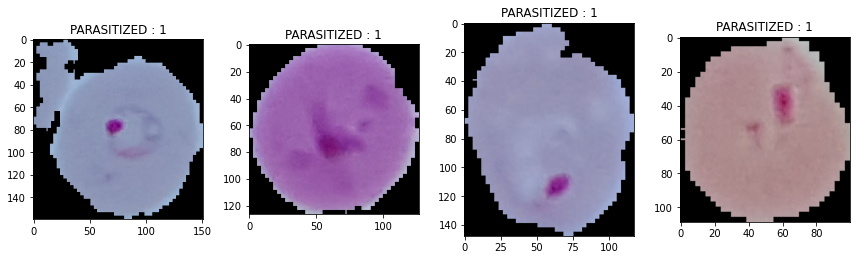

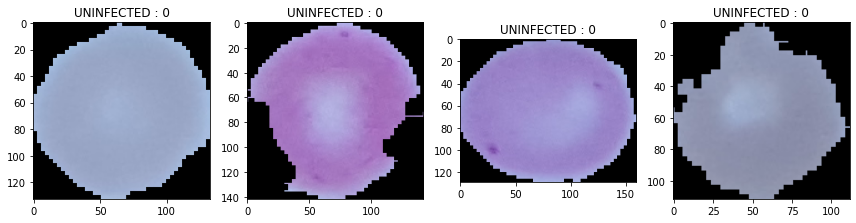

In [ ]:
import cv2

plt.figure(figsize = (12,24))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(para+ Parasitized[i])
    plt.imshow(img)
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

plt.figure(figsize = (12,24))
for i in range(4):
    plt.subplot(2, 4, i+1)
    img = cv2.imread(uninf+ Uninfected[i+1])
    plt.imshow(img)
    plt.title('UNINFECTED : 0')
    plt.tight_layout()
plt.show()

In [ ]:
# 70-30 Split
data = ImageDataGenerator(validation_split = 0.3)

batch_size =20
X = Y = 224

training = data.flow_from_directory(dir,
                                    class_mode = "categorical",
                                    target_size = (X, Y),
                                    color_mode="rgb",
                                    batch_size = batch_size, 
                                    shuffle = False,
                                    subset='training',
                                    seed = 42)

validation = data.flow_from_directory(dir,
                                      class_mode = "categorical",
                                      target_size = (X, Y),
                                      color_mode="rgb",
                                      batch_size = batch_size, 
                                      subset='validation',
                                      shuffle = False,seed=42)


Found 3500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import VGG19

vgg_conv = VGG19(weights='imagenet',
                    include_top=False,
                  input_shape=(224, 224, 3))

In [ ]:
vgg_conv.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
nTrain = 3500
nVal = 1500
batch_size=20

train_features = np.zeros(shape=(nTrain, 7, 7, 512))
train_labels = np.zeros(shape=(nTrain,2))

In [ ]:
i = 0
for inputs_batch, labels_batch in training:
  features_batch = vgg_conv.predict(inputs_batch)
  train_features[i * batch_size : (i + 1) * batch_size] = features_batch
  train_labels[i * batch_size : (i + 1) * batch_size] = labels_batch
  i += 1
  if i * batch_size >= nTrain:
     break
  
train_features = np.reshape(train_features, (nTrain, 7 * 7 * 512))

In [ ]:
validation_features = np.zeros(shape=(nVal, 7, 7, 512))
validation_labels = np.zeros(shape=(nVal,2))

In [ ]:
i = 0
for inputs_batch, labels_batch in validation:
  features_batch = vgg_conv.predict(inputs_batch)
  validation_features[i * batch_size : (i + 1) * batch_size] = features_batch
  validation_labels[i * batch_size : (i + 1) * batch_size] = labels_batch
  i += 1
  if i * batch_size >= nVal:
    break

validation_features = np.reshape(validation_features, (nVal, 7 * 7 * 512))

In [ ]:
import numpy as np
np.save("train_features.npy", train_features)
np.save("train_labels.npy", train_labels)
np.save("validation_features.npy", validation_features)
np.save("validation_labels.npy", validation_labels)

In [ ]:
train_features = np.load("/content/drive/MyDrive/Project_Akshay/Features_5k/train_features.npy")
train_labels = np.load("/content/drive/MyDrive/Project_Akshay/Features_5k/train_labels.npy")
validation_labels = np.load("/content/drive/MyDrive/Project_Akshay/Features_5k/validation_labels.npy")
validation_features = np.load("/content/drive/MyDrive/Project_Akshay/Features_5k/validation_features.npy")
print(train_features.shape)
print(train_labels.shape)
print(validation_features.shape)
print(validation_labels.shape)

(3500, 25088)
(3500, 2)
(1500, 25088)
(1500, 2)
